C:\Users\aksha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\aksha\AppData\Local\Temp/ipykernel_3928/1116322118.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_data['emp_length']=loan_data['emp_length'].str.replace('+','')


          loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200   
std    6.379377e+04      6.678594      0.491812        1.070219   
min    4.000000e+03      0.000000      0.000000        0.000000   
25%    4.040400e+04      8.170000      0.000000     

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
12,9000,9000,9000.0,36,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,1,...,305.38,0,Nov-12,1,INDIVIDUAL,0,0.0,0,0.0,0.0
15,1000,1000,1000.0,36,16.29%,35.31,D,D1,Internal revenue Service,1,...,36.32,0,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
29,8500,8500,8500.0,36,11.71%,281.15,B,B3,Oakridge homes,1,...,581.59,0,Jan-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0
52,7000,7000,7000.0,36,10.65%,228.02,B,B2,Aerotek Scientific,1,...,240.27,0,Dec-14,1,INDIVIDUAL,0,0.0,0,0.0,0.0
57,10000,10000,10000.0,36,12.42%,334.16,B,B4,Netflix,1,...,5803.94,0,Mar-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0
63,8000,8000,8000.0,36,16.77%,284.31,D,D2,Omniplex,1,...,606.54,0,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
74,14400,14400,14400.0,36,8.90%,457.25,A,A5,Model Metrics,1,...,464.02,0,Dec-14,1,INDIVIDUAL,0,0.0,0,0.0,0.0
90,12000,12000,12000.0,36,10.65%,390.88,B,B2,Insight Global,1,...,10046.57,0,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
130,7000,7000,7000.0,36,12.69%,234.82,B,B5,Best Buy,1,...,238.06,0,Jan-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0
156,12000,12000,11975.0,36,14.27%,411.71,C,C2,Rite aid,1,...,5359.38,0,Nov-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0


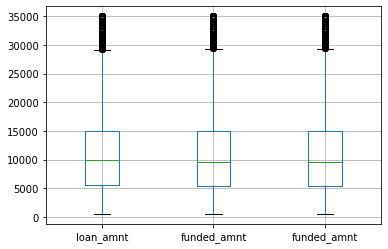

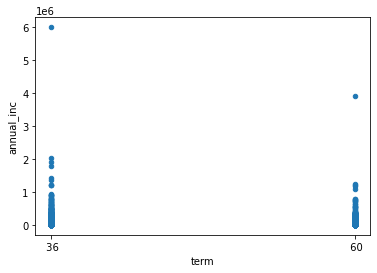

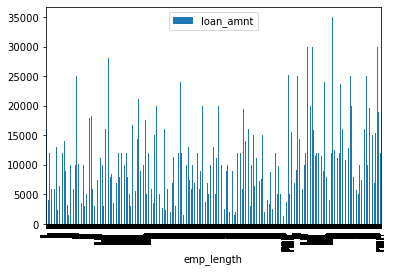

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
loan_data = pd.read_csv('D:\Lending Club case study\loan.csv')

r= len(loan_data.columns)

loan_data['term']=loan_data['term'].str.replace(' months','')
loan_data.dropna(axis=1,how= 'all', inplace=True)
loan_data.dropna(axis=0,thresh=2, inplace=True)
loan_data.fillna(0,inplace=True)
loan_data['emp_length']=loan_data['emp_length'].str.replace(' years','')
loan_data['emp_length']=loan_data['emp_length'].str.replace(' year','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('+','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('<','')
loan_data['emp_length']=loan_data['emp_length'].str.replace('>','')
loan_data=loan_data.sort_values(by=['term','emp_length'],ascending=True)

loan_data.rename({'title':'purpose'},axis=1)
loan_data.drop("id",axis=1, inplace=True)
loan_data.drop("member_id",axis=1, inplace=True)
loan_data.drop("collections_12_mths_ex_med",axis=1, inplace=True)
print(loan_data.describe())
plot1=loan_data.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt']) 
print(plot1)
loan_data['term']
loan_data.plot.scatter(x='term', y='annual_inc')
loan_data.plot.bar(x='emp_length', y='loan_amnt', stacked=True)
#loan_data.plot.scatter(x='emp_length', y='loan_amnt')
loan_data.head(10)